## Initalization
Load up everything needed. This is tricky because we now have to deal with a non-strucutre preserving operations to count the number of jets and turn that into a number associated with each entry.

In [1]:
%%time
import pandas as pd
import uproot
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import numpy as np

Wall time: 1.33 s


## Load required data from a file
In this case we will load only the MET branch as we are trying to be as efficient as we can. The call to keys() below will dump out all possible leaves that we could be loading in

In [2]:
file = [r'file://C:\Users\gordo\Documents\GRIDDS\user.emma.mc15_13TeV.361023.Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ3W.merge.DAOD_EXOT15.e3668_s2576_s2132_r7773_r7676_p2952.v201\copied\ntuples_QCD_JZ3__0_addFullEtaMLP.root']
reco_tree = uproot.open(file[0])["recoTree"]

In [3]:
reco_tree.keys()

[b'eventNumber',
 b'eventCount',
 b'runNumber',
 b'lumiBlock',
 b'backgroundFlags',
 b'eventWeight',
 b'prwHash',
 b'pdfEventWeights',
 b'pileupEventWeight',
 b'xSecEventWeight',
 b'actualIntPerCrossing',
 b'averageIntPerCrossing',
 b'event_HT',
 b'event_MHToHT',
 b'event_NJets',
 b'event_NCleanJets',
 b'event_NBIBJets',
 b'event_HTMiss',
 b'event_Meff',
 b'event_sumMinDR',
 b'event_tauRoI_maxET',
 b'event_passCalRatio_cleanLLP_TAU60',
 b'event_passCalRatio_cleanLLP_TAU60_noiso',
 b'event_passL1TAU60',
 b'event_passCalRatio_cleanLLP_LLPNOMATCH',
 b'event_passCalRatio_cleanLLP_LLPNOMATCH_noiso',
 b'event_passEmulationCalRatio_cleanLLP_LLPNOMATCH_noiso',
 b'event_passL1LLPNOMATCH',
 b'event_passEmulationL1LLPNOMATCH',
 b'event_passCalRatio_cleanLLP_LLPRO',
 b'event_passCalRatio_cleanLLP_LLPRO_noiso',
 b'event_passL1LLPRO',
 b'event_passJ25',
 b'event_passJ100',
 b'event_passJ400',
 b'event_passJ150_bperf_split',
 b'event_passJ15_bperf_split',
 b'event_passJ320_bperf_split',
 b'event_pass

In [4]:
%%time
jetinfo = reco_tree.arrays(['event_HTMiss', 'CalibJet_pT', 'CalibJet_eta'])

Wall time: 2.78 s


In [5]:
%%time
jetinfo

Wall time: 0 ns


{b'CalibJet_eta': jaggedarray([[ 0.42504969  0.82514822 -0.24560158  1.60645711  3.64541936],
              [-0.16888061  0.1167803   0.60289824 ... -2.57046103 -0.32872817 -0.55654931],
              [-0.35294127  1.94779444 -0.57573891 ...  1.33996677 -2.16915703 -1.78981686],
              ...,
              [-1.42732191  0.04638668  0.26895449 -0.78984368  2.15724277],
              [-1.18132842 -1.60765386 -0.61740237 ...  0.027003    3.22726488  3.80523849],
              [ 0.07581185 -2.15132952 -3.07128119 ... -1.19127274 -3.24213314 -2.82043338]]),
 b'CalibJet_pT': jaggedarray([[ 397.33746875  102.14053125  101.37173438   46.37198437   21.0346543 ],
              [ 325.38840625  224.84854688   87.839875   ...  18.348625    18.21963672  17.38869336],
              [ 355.8906875   175.6294375   124.04192187 ...  21.37303516  20.47201172  20.25007031],
              ...,
              [ 383.48553125  311.0424375    80.18246094   26.22417773   18.08358008],
              [ 257.602

## Select
Figure out what the selection is for the events

In [6]:
%%time
eta = jetinfo[b'CalibJet_eta']
good_eta = np.abs(eta.content) < 2.0
pt = jetinfo[b'CalibJet_pT']
good_pt = pt.content > 40.0
good_jet = uproot.interp.jagged.JaggedArray(good_eta & good_pt, eta.starts, eta.stops)

Wall time: 160 ms


In [7]:
%%time
good_event = [sum(l) > 2.0 for l in good_jet]

Wall time: 48.8 s


## Plot
plot everything

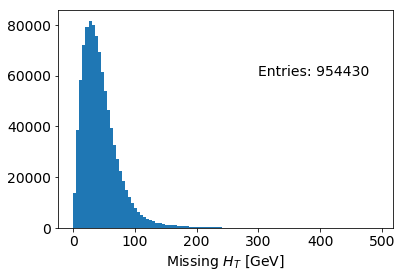

Wall time: 940 ms


In [8]:
%%time
# First, figure out which jets have a good eta
mht = jetinfo[b'event_HTMiss']

plt.hist(mht[good_event], bins=100)
plt.xlabel('Missing $H_{T}$ [GeV]')
plt.text(300, 60000, "Entries: {0}".format(len(mht[good_event])))
plt.show()